In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sys
sys.path.append("..")
import fastcat as fc

In [2]:
ztrues=np.array([0.1,0.4,0.62,0.8,1.0])
zar=np.linspace(0,1.4,1000)

In [3]:
#photozs that we have
pzs=[]
pzs.append(("Gauss",fc.photoz.PhotoZGauss(0.02)))
pzs.append(("TwoPop",fc.photoz.PhotoZTwoPop(0.02,0.75,3.)))
pzs.append(("HiddenVar",fc.photoz.PhotoZHiddenVar(0.02,[0.1,0.2],[0.6,0.65])))
#pzs.append(("Franzona",fc.photoz.PhotoZHist("/project/projectdirs/lsst/LSSWG/Franzona/pzdist.txt")))
pzs.append(('TemplateSED',fc.photoz.PhotoZTemplateSED("/Users/aimalz/Documents/Photoz-tools")))

Applying PZs
[(0.08696538209915161, 0.02199999988079071)]
Applying PZs
[(0.28191402554512024, 0.08799999952316284)]
Applying Hidden Var PZs
[(3.349061965942383, 4.5735731067472685)]
Applying Template SED PZs
[(0.10000000149011612,)]
Applying PZs
[(0.399647057056427, 0.0279999990016222)]
Applying PZs
[(0.3847430944442749, 0.1119999960064888)]
Applying Hidden Var PZs
[(13.31599235534668, 12.666507770866946)]
Applying Template SED PZs
[(0.4000000059604645,)]
Applying PZs
[(0.6124604344367981, 0.03240000084042549)]
Applying PZs
[(0.6236466765403748, 0.03240000084042549)]
Applying Hidden Var PZs
[(-1.3314296007156372, 17.286107171356658)]
Applying Template SED PZs
[(0.6200000047683716,)]
Applying PZs
[(0.8046888709068298, 0.035999998450279236)]
Applying PZs
[(0.6652748584747314, 0.14399999380111694)]
Applying Hidden Var PZs
[(2.17632794380188, 5.545163075428968)]
Applying Template SED PZs
[(0.800000011920929,)]
Applying PZs
[(0.9712157845497131, 0.03999999910593033)]
Applying PZs
[(1.086790

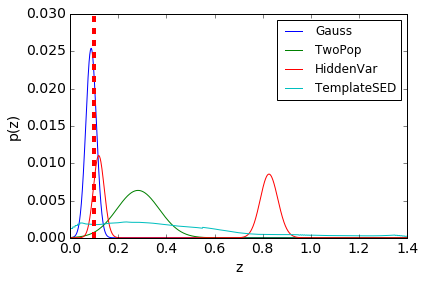

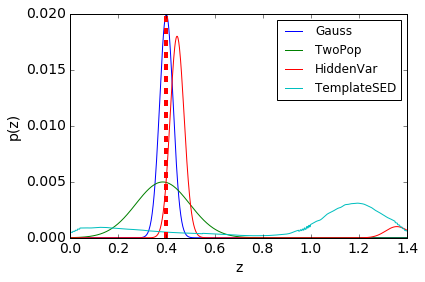

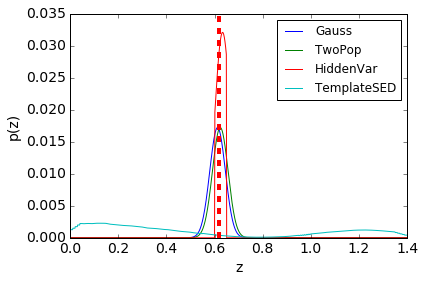

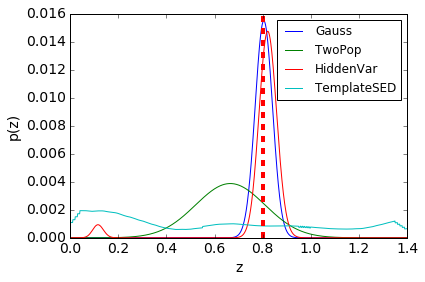

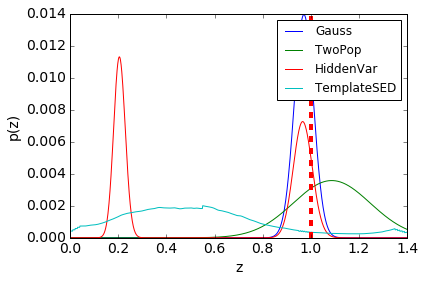

In [4]:
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
for ztrue in ztrues:
    plt.figure(figsize=(6,4))
    for name,pz in pzs:
        arr=np.array(np.array([ztrue]),dtype=[('z',np.float32)])
        arr=pz.applyPhotoZ(arr)
        print arr
        p=np.array([pz.PofZ(arr,float(z),0.1) for z in zar])
        p/=np.sum(p)#p.sum()
        plt.plot(zar,p,label=name)
    plt.legend()
    ymin,ymax=plt.ylim()
    plt.plot([ztrue,ztrue],[ymin,ymax],'r--',lw=4)
    plt.ylim(ymin,ymax)
    plt.xlabel("z",fontsize=14)
    plt.ylabel("p(z)",fontsize=14)
    plt.tight_layout()
    plt.savefig ('ptest'+str(ztrue)+'.pdf')
    